# Evaluate Data

In [1]:
import LoadData
import numpy as np
import pandas as pd
import tensorflow as tf
import EvaluationFunctions

2025-04-01 23:41:22.694044: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 23:41:22.702406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-01 23:41:22.712244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-01 23:41:22.715223: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-01 23:41:22.722929: I tensorflow/core/platform/cpu_feature_guar

## Load the Model

In [ ]:
# Multi-Headed Attention Model
model_name = "Multi-Headed Attention Model"
model_path = "./log/testServerModels/MultiHeadAttentionModel_11_16_checkpoint_01.keras"

@tf.keras.utils.register_keras_serializable()
class ExpWeightedLossFunction(tf.keras.losses.Loss):
    def __init__(self, alpha=0.3, name="exp_weighted_loss_function", reduction=tf.keras.losses.Reduction.AUTO):
        super().__init__(name=name, reduction=reduction)
        self.alpha = alpha

    def call(self, y_true, y_pred):
        # Compute weight based on y_true using an exponential function
        # weight = tf.exp(self.alpha * (y_true - 0.5))
        weight = tf.exp(self.alpha * (y_true))

        # Compute the Mean Squared Error
        mse = tf.square(y_true - y_pred)

        # Multiply the mse by the weight and return the mean loss
        return tf.reduce_mean(weight * mse)

# Load the model
model = tf.keras.models.load_model(model_path)

I0000 00:00:1743547284.984323  120855 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1743547284.985215  120855 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1743547284.985296  120855 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1743547284.986300  120855 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

## Evaluate Model's Performance

In [3]:
test_path = "./data/.temp/test.db"
batch_size = 32
sample_limit = 1000

### All Data Performance

#### Get Test Metrics

In [4]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
metric = model.evaluate(AllDataLoader)
print(f"Metrics: {model.metrics_names}")
print(metric)

[main] Processing batch in process id: 112713
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 112713
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 112713
Using new dataset


I0000 00:00:1743544574.567629  120427 service.cc:146] XLA service 0x7b9cec009a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743544574.567669  120427 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-04-01 22:56:14.590594: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-01 22:56:14.675626: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-04-01 22:56:14.721956: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward

     33/Unknown 5s 5ms/step - loss: 7.2335e-04 - mae: 0.0494 - mape: 40498064.0000 - mse: 0.0103

I0000 00:00:1743544578.145174  120427 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  15608/Unknown 50s 3ms/step - loss: 5.0231e-04 - mae: 0.0462 - mape: 37906060.0000 - mse: 0.0095[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 112713
Using new dataset
  31245/Unknown 90s 3ms/step - loss: 5.0656e-04 - mae: 0.0462 - mape: 37851692.0000 - mse: 0.0094[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 112713
Using new dataset
  46834/Unknown 109s 2ms/step - loss: 5.0900e-04 - mae: 0.0462 - mape: 37836852.0000 - mse: 0.0094[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 112713
Using new dataset
  62465/Unknown 128s 2ms/step - loss: 5.0978e-04 - mae: 0.0462 - mape: 37826804.0000 - mse: 0.0094[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 112713
Using new dataset
  93739/Unknown 166s 2ms/step - loss: 5.1047e-04 - mae: 0.0462 - mape: 37805384.0000 - mse: 0.0094
Size of dataset (All-Testing): 3000000
93750/93750 ━━━━━━━━━━━━━━━━━━━━ 166s 2ms/step - loss: 5.1047e-04 - mae: 0.0462 - mape: 3780

2025-04-01 22:58:59.846967: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-01 22:58:59.847006: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2025-04-01 22:58:59.847019: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16007780667991472268
2025-04-01 22:58:59.847027: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6545129480839727142
2025-04-01 22:58:59.847034: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14431420043013094558
2025-04-01 22:58:59.847047: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15521738927586094636
/home/ch

#### Get True vs Predicted Graph

In [5]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
y_pred = model.predict(AllDataLoader)

[main] Processing batch in process id: 112713
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 112713
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 112713
Using new dataset
  15612/Unknown 18s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 112713
Using new dataset
  31202/Unknown 34s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 112713
Using new dataset
  46836/Unknown 50s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 112713
Using new dataset
  62457/Unknown 67s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 112713
Using new d

In [6]:
AllDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'All-Testing')
y_true = np.concatenate([labels for _, labels, _ in AllDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 112713
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 112713
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 112713
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 112713
Using new dataset

Size of dataset (All-Testing): 3000000


2025-04-01 23:01:31.713559: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


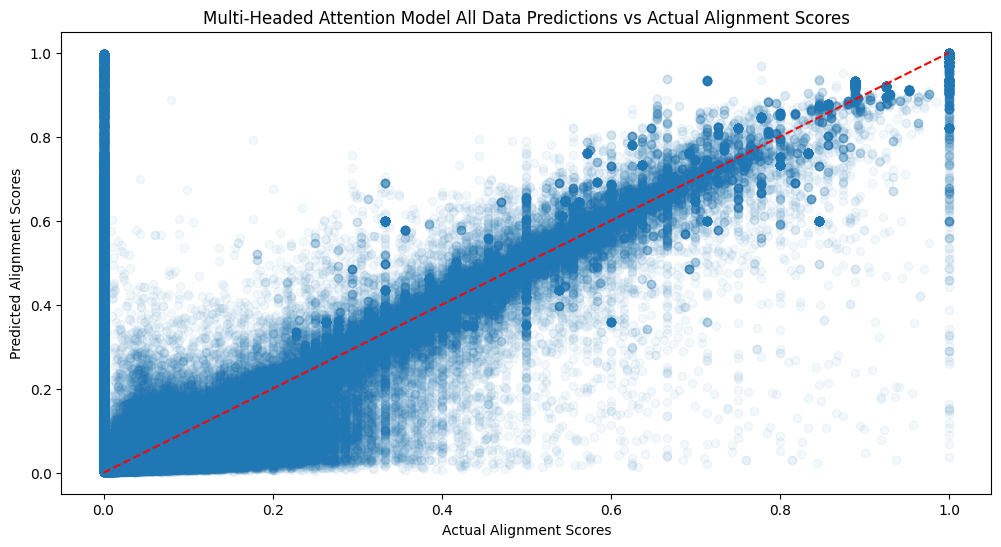

In [7]:
import importlib

importlib.reload(EvaluationFunctions)
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} All Data")

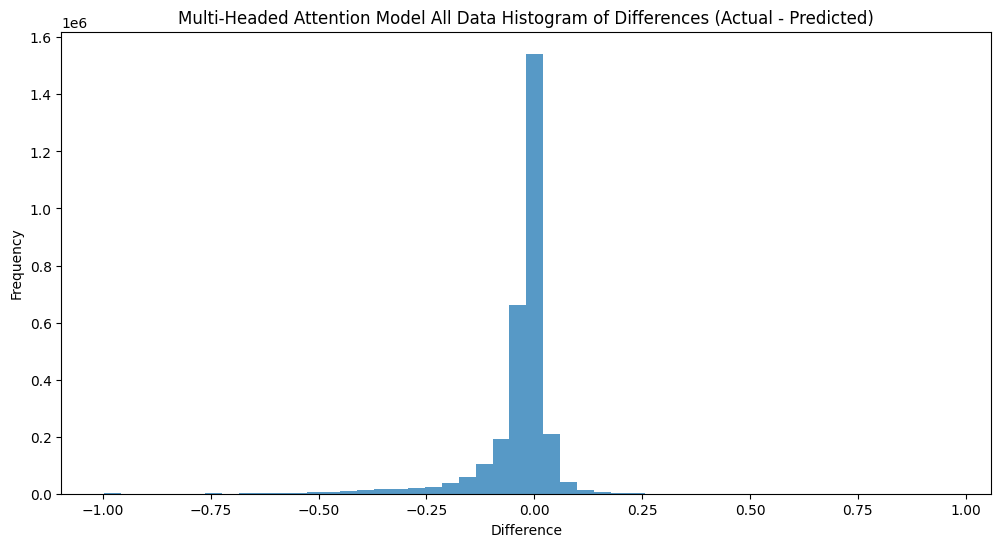

In [8]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} All Data")

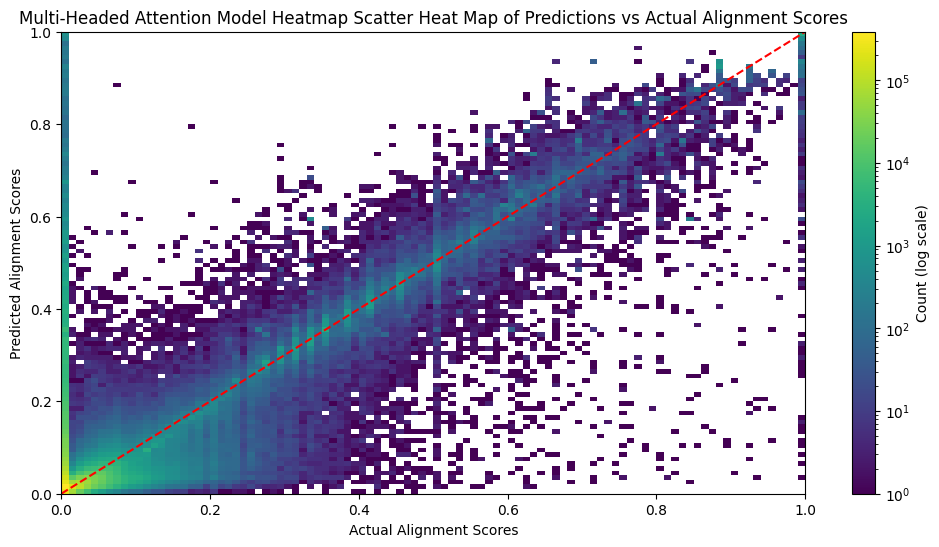

In [9]:
import importlib

importlib.reload(EvaluationFunctions)
EvaluationFunctions.PlotHeatMapScatter(y_true, y_pred, f"{model_name} Heatmap Scatter")

### Non-Zero Data Performance

#### Get Test Metrics

In [4]:
condition = lambda x : x != 0

In [5]:
condition = lambda x : x != 0
NonZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'NonZero-Testing', condition = condition)
metric = model.evaluate(NonZeroDataLoader)
print(metric)

[main] Processing batch in process id: 120855
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 120855
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 120855
Using new dataset


I0000 00:00:1743547289.762398  122188 service.cc:146] XLA service 0x78100c0094d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743547289.762422  122188 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-04-01 23:41:29.776655: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-01 23:41:29.828966: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-04-01 23:41:29.856726: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward

    101/Unknown 3s 2ms/step - loss: 0.0010 - mae: 0.0167 - mape: 46.7172 - mse: 0.0010

I0000 00:00:1743547291.701297  122188 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


   7799/Unknown 15s 2ms/step - loss: 9.8488e-04 - mae: 0.0166 - mape: 52.3653 - mse: 9.8488e-04[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 120855
Using new dataset
  15607/Unknown 25s 1ms/step - loss: 9.9374e-04 - mae: 0.0166 - mape: 52.6565 - mse: 9.9374e-04[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 120855
Using new dataset
  23427/Unknown 36s 1ms/step - loss: 9.9885e-04 - mae: 0.0167 - mape: 52.7441 - mse: 9.9885e-04[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 120855
Using new dataset
  31224/Unknown 46s 1ms/step - loss: 0.0010 - mae: 0.0167 - mape: 52.7850 - mse: 0.0010[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 120855
Using new dataset
  46787/Unknown 66s 1ms/step - loss: 0.0010 - mae: 0.0167 - mape: 52.8442 - mse: 0.0010
Size of dataset (NonZero-Testing): 1500222
  46875/Unknown 66s 1ms/step - loss: 0.0010 - mae: 0.0167 - mape: 52.8445 - mse: 0.0010

2025-04-01 23:42:35.588407: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11', 4 bytes spill stores, 4 bytes spill loads

2025-04-01 23:42:36.082063: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_11', 4 bytes spill stores, 4 bytes spill loads



46882/46882 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step - loss: 0.0010 - mae: 0.0167 - mape: 52.8445 - mse: 0.0010
[0.0010073077864944935, 0.0010073077864944935, 0.0167232658714056, 52.97377395629883]


2025-04-01 23:42:37.123999: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2025-04-01 23:42:37.124042: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2025-04-01 23:42:37.124055: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14597853101441949935
2025-04-01 23:42:37.124063: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1988487143657702067
2025-04-01 23:42:37.124071: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11650449977352551813
/home/chuongg3/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. M

#### Get True vs Predicted Graph

In [6]:
NonZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'NonZero-Testing', condition = condition)
y_pred = model.predict(NonZeroDataLoader)

[main] Processing batch in process id: 120855
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 120855
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 120855
Using new dataset
   7784/Unknown 10s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 120855
Using new dataset
  15625/Unknown 20s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 120855
Using new dataset
  23450/Unknown 29s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 120855
Using new dataset
  31248/Unknown 39s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 120855
Using new d

In [7]:
NonZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'NonZero-Testing', condition = condition)
y_true = np.concatenate([labels for _, labels, _ in NonZeroDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 120855
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 120855
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 120855
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 120855
Using new dataset

Size of dataset (NonZero-Testing): 1500222


2025-04-01 23:43:58.938661: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


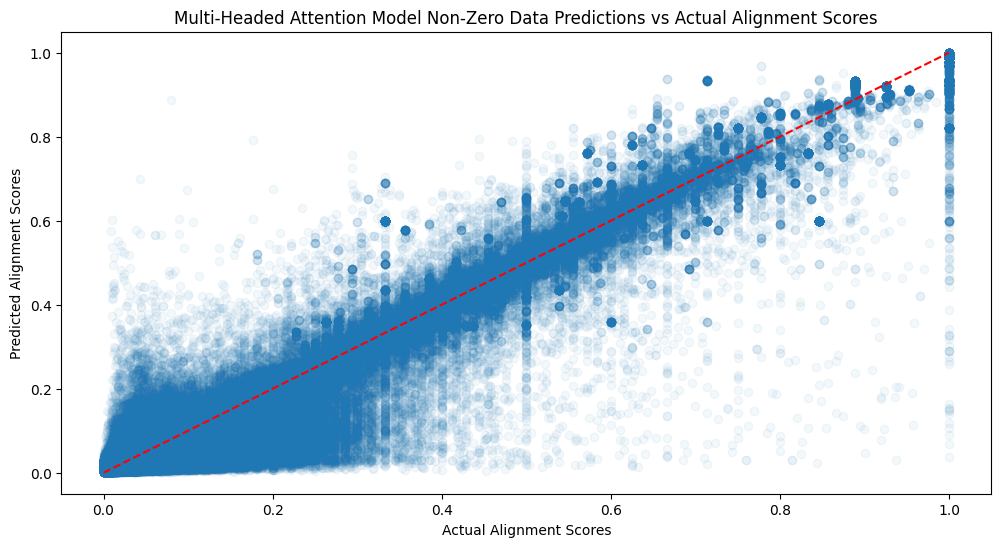

In [8]:
import importlib

importlib.reload(EvaluationFunctions)
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Non-Zero Data")

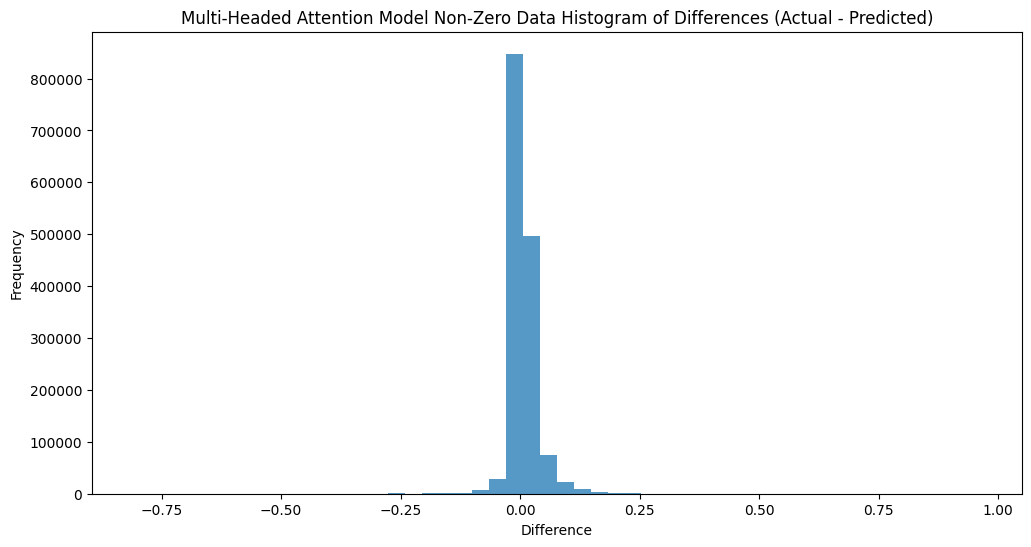

In [9]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} Non-Zero Data")

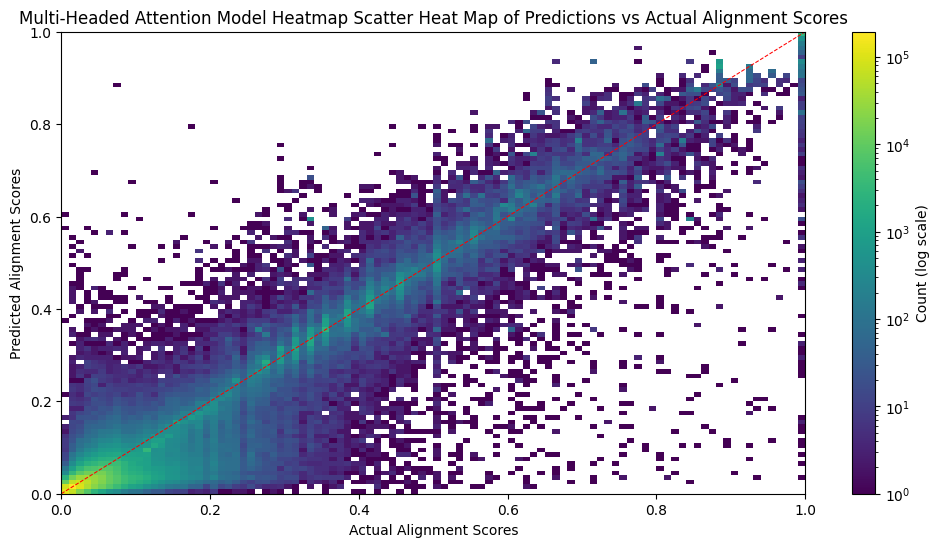

In [14]:
import importlib

importlib.reload(EvaluationFunctions)
EvaluationFunctions.PlotHeatMapScatter(y_true, y_pred, f"{model_name} Heatmap Scatter")

In [15]:
np.unique(y_true, return_counts=True)

(array([2.2171966e-05, 2.2174178e-05, 2.2176637e-05, ..., 9.7619045e-01,
        9.8484850e-01, 1.0000000e+00], dtype=float32),
 array([   1,    1,    1, ...,   11,    1, 4622]))

In [16]:
np.unique(y_pred, return_counts=True)

(array([0.0000000e+00, 2.9541333e-39, 2.9576968e-39, ..., 8.4636110e-01,
        8.6038399e-01, 8.6339664e-01], dtype=float32),
 array([65257,     1,     2, ...,     1,     1,     1]))

### Zero Data Performance

#### Get Test Metrics

In [17]:
condition = lambda x : x == 0
ZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore == 0', condition=condition)
metric = model.evaluate(ZeroDataLoader)
print(metric)

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
   7773/Unknown 12s 1ms/step - loss: 2.0372e-05 - mae: 0.0807 - mape: 80672232.0000 - mse: 0.0204[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
  15586/Unknown 25s 2ms/step - loss: 2.0312e-05 - mae: 0.0806 - mape: 80614568.0000 - mse: 0.0203[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
  23375/Unknown 38s 2ms/step - loss: 2.0290e-05 - mae: 0.0806 - mape: 80610816.0000 - mse: 0.0203[load_npz_

2025-03-11 13:21:10.538227: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 6345170289791688741
2025-03-11 13:21:10.538273: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9557875914754108703
2025-03-11 13:21:10.538286: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 13631237261018244501
2025-03-11 13:21:10.538301: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12720352834100404123


#### Get True vs Predicted Graph

In [18]:
ZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore == 0', condition=condition)
y_pred = model.predict(ZeroDataLoader)

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
   7772/Unknown 11s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
  15601/Unknown 21s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
  23399/Unknown 31s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 16108
Using new dataset
  31209/Unknown 42s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 16108
Using new dataset
 

In [19]:
ZeroDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore == 0', condition=condition)
y_true = np.concatenate([labels for _, labels, _ in ZeroDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 16108
Using new dataset

Size of dataset (WHERE AlignmentScore == 0): 1499778


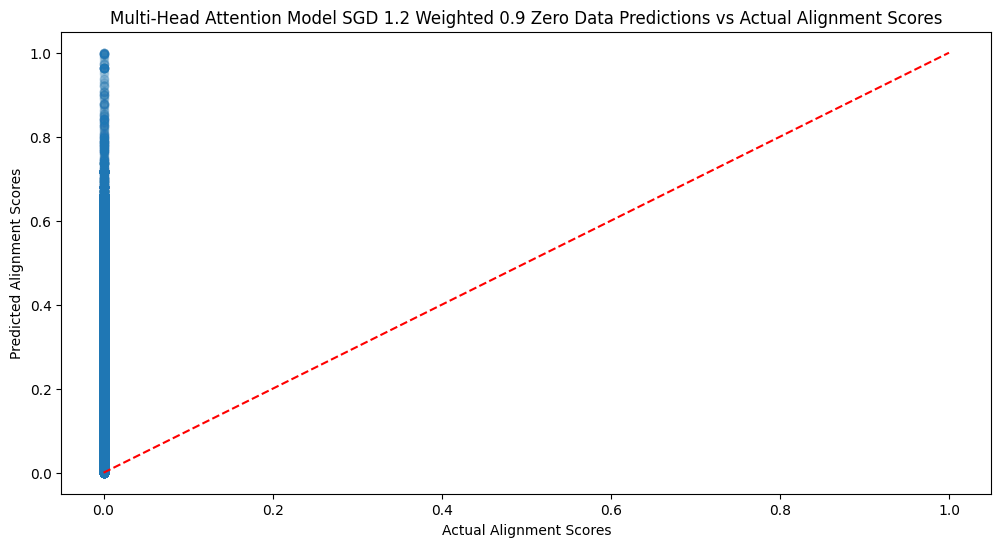

In [20]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Zero Data")

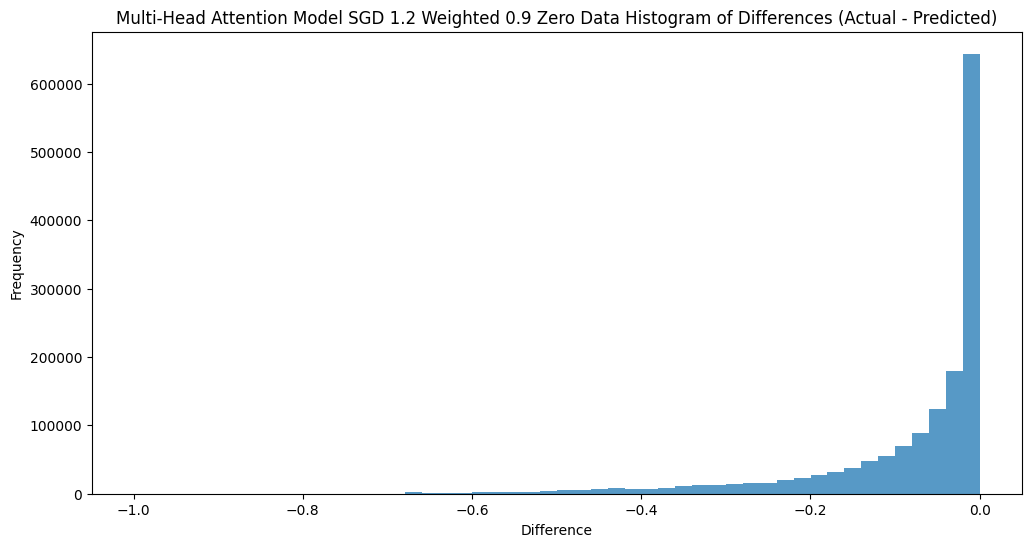

In [21]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} Zero Data")

### Non-Zero and Non-One Data Performance

#### Get Test Metrics

In [22]:
condition = lambda x: (x != 0) & (x != 1)
NonZeroNonOneDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1', condition=condition)
metric = model.evaluate(NonZeroNonOneDataLoader)
print(metric)

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
   7788/Unknown 12s 2ms/step - loss: 0.0031 - mae: 0.0325 - mape: 93.4990 - mse: 0.0029[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
  15574/Unknown 24s 2ms/step - loss: 0.0031 - mae: 0.0325 - mape: 92.9732 - mse: 0.0029[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
  23357/Unknown 37s 2ms/step - loss: 0.0031 - mae: 0.0325 - mape: 93.1103 - mse: 0.0029[load_npz_arrays] Loading file ./data/.t

2025-03-11 13:24:14.773657: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 6345170289791688741
2025-03-11 13:24:14.773710: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9557875914754108703
2025-03-11 13:24:14.773722: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 13631237261018244501
2025-03-11 13:24:14.773737: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 12720352834100404123


#### Get True vs Predicted Graph

In [23]:
NonZeroNonOneDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1', condition=condition)
y_pred = model.predict(NonZeroNonOneDataLoader)

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
   7781/Unknown 12s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
  15552/Unknown 23s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
  23353/Unknown 35s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 16108
Using new dataset
  31139/Unknown 45s 1ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 16108
Using new dataset
 

In [24]:
NonZeroNonOneDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore != 0 AND AlignmentScore != 1', condition=condition)
y_true = np.concatenate([labels for _, labels, _ in NonZeroNonOneDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 16108
Using new dataset

Size of dataset (WHERE AlignmentScore != 0 AND AlignmentScore != 1): 1495600


2025-03-11 13:26:00.369186: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


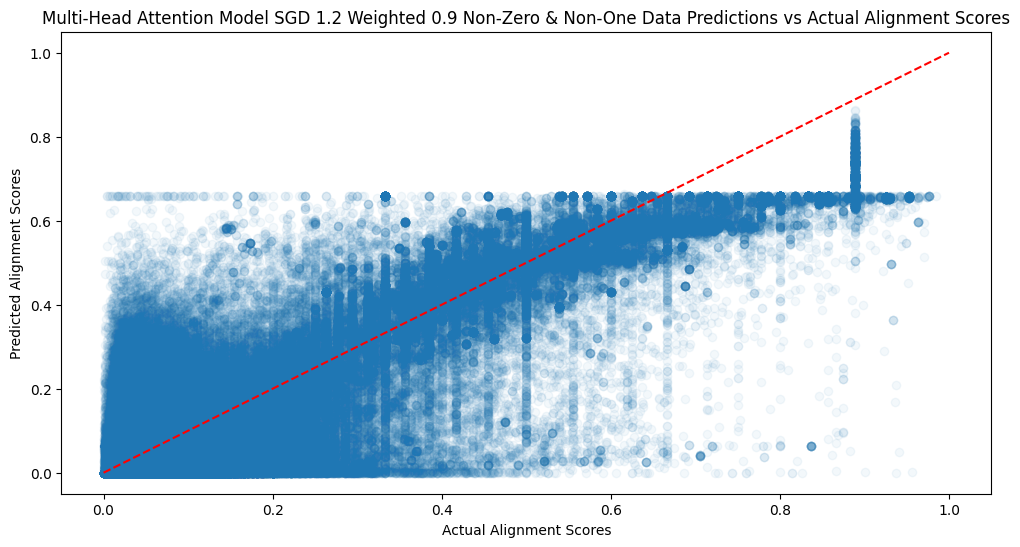

In [25]:
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} Non-Zero & Non-One Data")

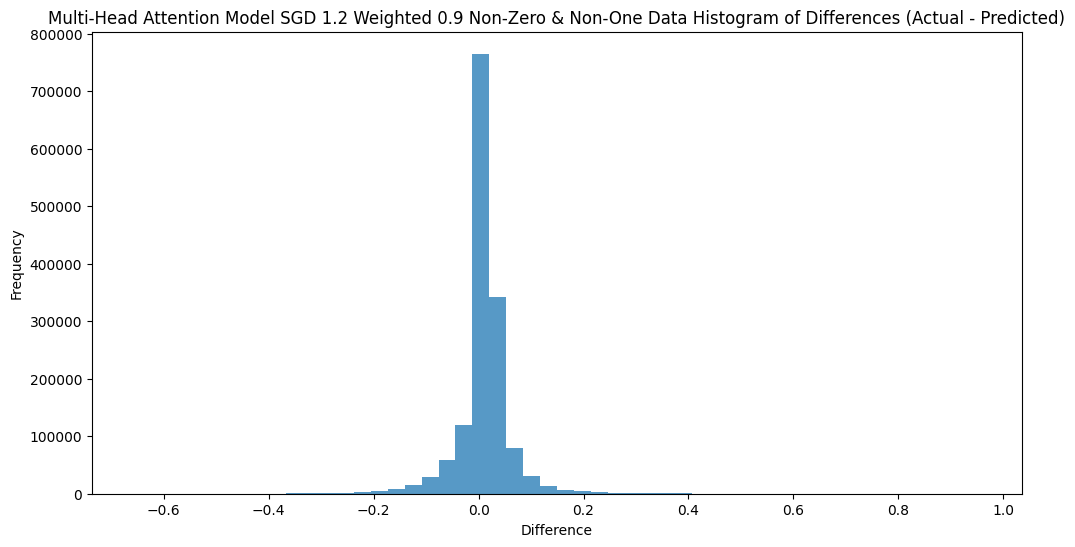

In [26]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} Non-Zero & Non-One Data")

### > 0.5  Data Points

#### Get Test Metrics

In [27]:
condition = lambda x : (x > 0.5) & (x < 1)
HighDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1', condition = condition)
metric = model.evaluate(HighDataLoader)
print(metric)

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
    112/Unknown 1s 2ms/step - loss: 0.0335 - mae: 0.1171 - mape: 16.7618 - mse: 0.0253[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
    230/Unknown 1s 2ms/step - loss: 0.0340 - mae: 0.1177 - mape: 16.8871 - mse: 0.0258[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
    356/Unknown 1s 2ms/step - loss: 0.0342 - mae: 0.1180 - mape: 16.9389 - mse: 0.0260[load_npz_arrays] Loading file ./data/.temp

2025-03-11 13:26:05.064659: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 6345170289791688741
2025-03-11 13:26:05.064681: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 9557875914754108703
2025-03-11 13:26:05.064690: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 13631237261018244501


#### Get True VS Predicted Graph

In [28]:
HighDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1', condition = condition)
y_pred = model.predict(HighDataLoader)

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
     91/Unknown 0s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
    232/Unknown 1s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
    345/Unknown 1s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 16108
Using new dataset
    472/Unknown 1s 2ms/step[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 16108
Using new dataset
    6

In [29]:
HighDataLoader = LoadData.LoadNumpyDataset(test_path, batch_size, 'WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1', condition = condition)
y_true = np.concatenate([labels for _, labels, _ in HighDataLoader.as_numpy_iterator()])

[main] Processing batch in process id: 16108
['./data/.temp/test_0.npz', './data/.temp/test_1.npz', './data/.temp/test_2.npz', './data/.temp/test_3.npz', './data/.temp/test_4.npz', './data/.temp/test_5.npz'] files found ...
Using new dataset
[NumpyDataset] Loading file ./data/.temp/test_encodings.npy in process id: 16108
[load_npz_arrays] Loading file ./data/.temp/test_0.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_1.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_2.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_3.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_4.npz in process id: 16108
Using new dataset
[load_npz_arrays] Loading file ./data/.temp/test_5.npz in process id: 16108
Using new dataset

Size of dataset (WHERE AlignmentScore >= 0.5 AND AlignmentScore < 1): 23399


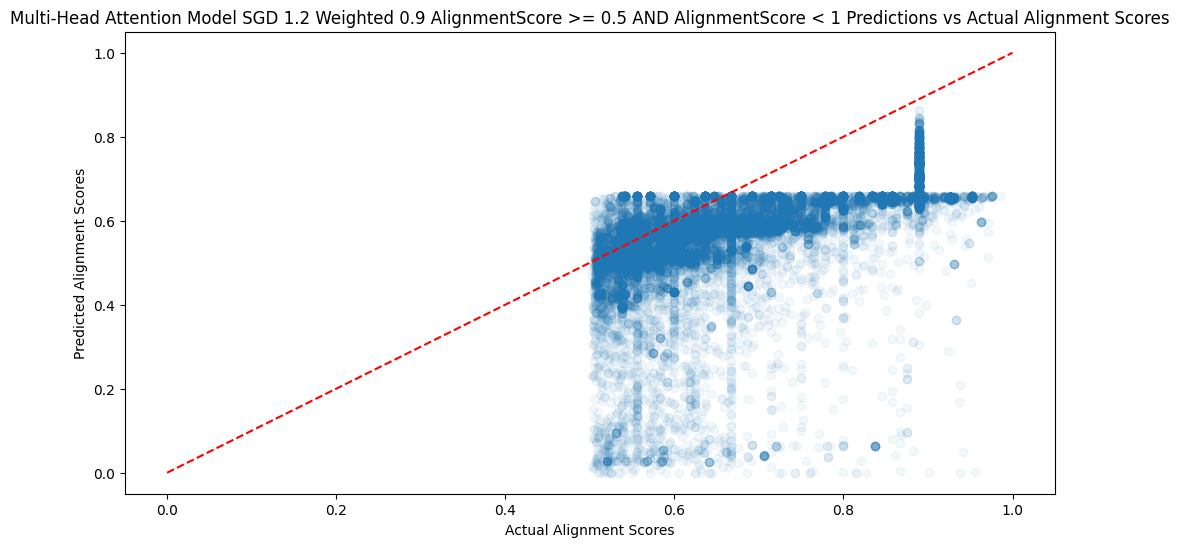

In [30]:
import importlib
importlib.reload(EvaluationFunctions)
EvaluationFunctions.PlotTrueVsPredicted(y_true, y_pred, f"{model_name} AlignmentScore >= 0.5 AND AlignmentScore < 1")

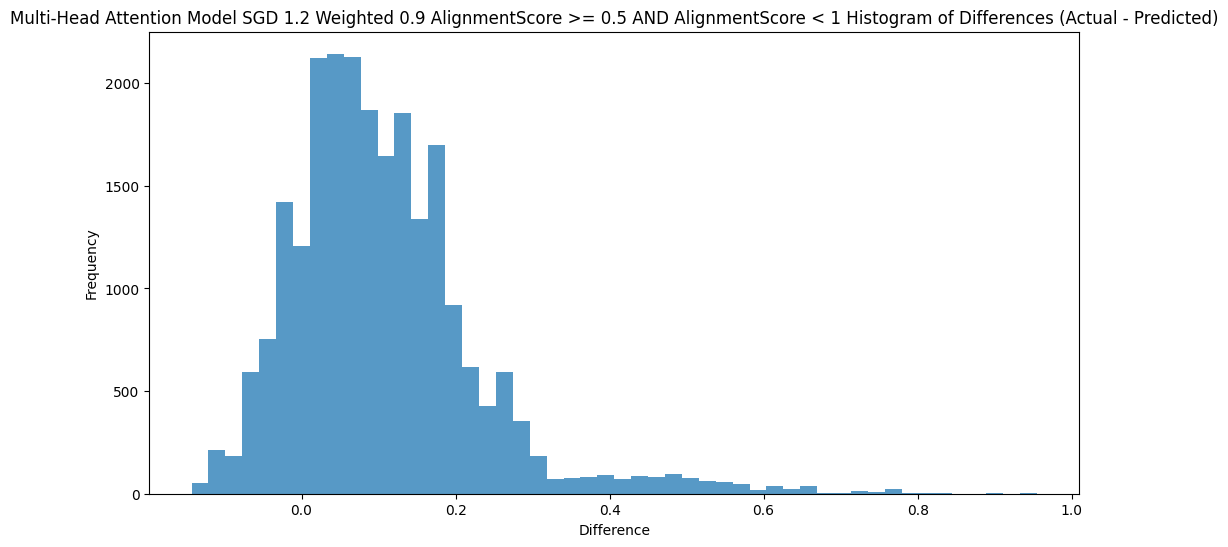

In [31]:
EvaluationFunctions.PlotDifferenceHistogram(y_true, y_pred, f"{model_name} AlignmentScore >= 0.5 AND AlignmentScore < 1")

In [32]:
np.unique(y_true, return_counts=True)

(array([0.5030675 , 0.50340134, 0.50344825, ..., 0.97590363, 0.97619045,
        0.9848485 ], dtype=float32),
 array([ 1,  1,  1, ...,  1, 11,  1]))

In [33]:
np.unique(y_pred, return_counts=True)

(array([0.0000000e+00, 2.3993153e-37, 1.4334286e-15, ..., 8.4636110e-01,
        8.6038399e-01, 8.6339664e-01], dtype=float32),
 array([14,  1,  1, ...,  1,  1,  1]))